In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Definitions
- $x\ge 0$ is the current energy
- $x_{max}$ is the maximum energy
- $a \ge 0$ is the amount of wei paid
- $\Delta(x,a)$ is the amount of energy recieved for paying $a$ eth when the current energy is $x$
- $x^+ = x + \Delta(x,a)$ is the new energy after a payment of $a$ at prior energy $x$
- $c$ is the cost of a unit of energy in gwei when energy is 0.

Goal is to define the function $\Delta(x,a)$ statisfying the following

Requirements

- for any pair $(x,a)$ the value $\Delta(x,a) \le x_{max}-x$
- the cost of buying 1 unit of energy when there is none: $\Delta(0,c)=1$
- for fixed amount $a$ and energy levels $x_1<x_2$ then $\Delta(x_1,a)> \Delta(x_2,a)$
- for fixed energy $x$ and payment amounts $a_1<a_2$ then $\Delta(x,a_1) < \Delta(x,a_2)$
- for any energy $x$, as $a\rightarrow \infty$ then $x^+=\Delta(x,a)+x \rightarrow x_{max}$

In [3]:
xmax= 1000
c= 10
x= np.arange(0, xmax, 1)
a= np.array([c*2**(1+0.01*i) for i in range(1000)])

In [4]:
b= .99
def delta(x,a):
    gap = xmax - x
    ratio =  b**(a)
    newgap = gap*ratio
    newx = xmax - newgap
    
    output = newx - x

    return output

In [5]:
Delta = np.array([delta(x,a[i]) for i in range(1000)])

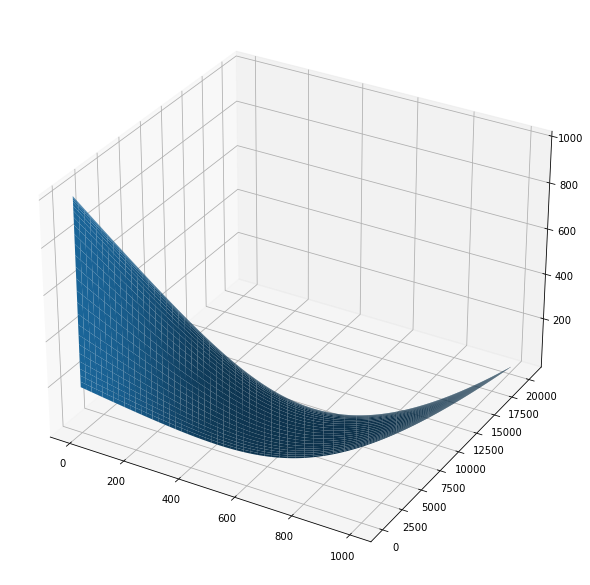

In [6]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x,a,Delta)

Text(0, 0.5, 'amount of energt recieved `Delta`')

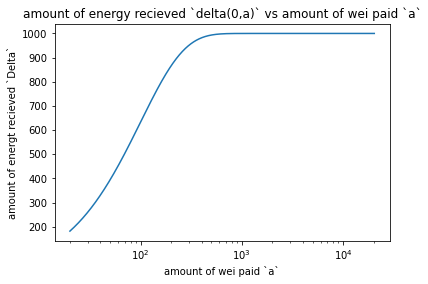

In [7]:
#let x=0
plt.semilogx(a,Delta[:,0])
plt.title('amount of energy recieved `delta(0,a)` vs amount of wei paid `a`')
plt.xlabel('amount of wei paid `a`')
plt.ylabel('amount of energt recieved `Delta`')

Text(0, 0.5, 'amount of energy recieved `delta(x,c)`')

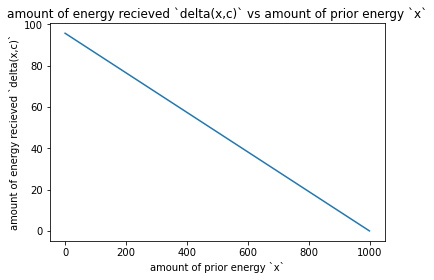

In [8]:
#let a=c
plt.plot(x,[delta(v,c) for v in x ])
plt.title('amount of energy recieved `delta(x,c)` vs amount of prior energy `x`')
plt.xlabel('amount of prior energy `x`')
plt.ylabel('amount of energy recieved `delta(x,c)`')

Text(0, 0.5, 'amount of energy recieved `delta(x,100c)`')

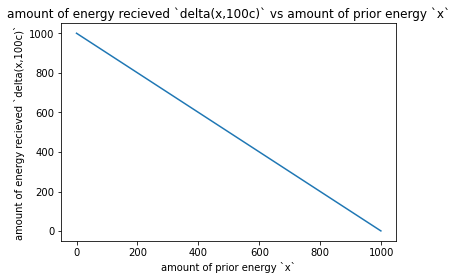

In [9]:
#let a=100*c
plt.plot(x,[delta(v,100*c) for v in x ])
plt.title('amount of energy recieved `delta(x,100c)` vs amount of prior energy `x`')
plt.xlabel('amount of prior energy `x`')
plt.ylabel('amount of energy recieved `delta(x,100c)`')

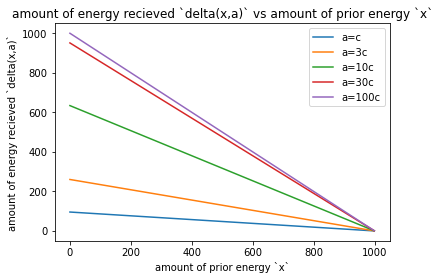

In [10]:
plt.plot(x,delta(x,c),x,delta(x,3*c),x,delta(x,10*c), x,delta(x,30*c),x,delta(x,100*c))
plt.title('amount of energy recieved `delta(x,a)` vs amount of prior energy `x`')
plt.xlabel('amount of prior energy `x`')
plt.ylabel('amount of energy recieved `delta(x,a)`')
plt.legend(['a=c','a=3c','a=10c','a=30c','a=100c'])

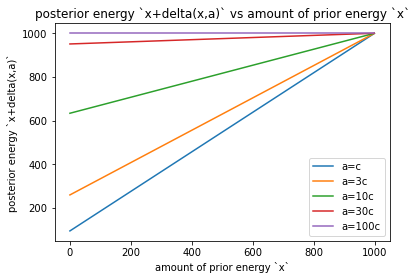

In [11]:
plt.plot(x,delta(x,c)+x,x,delta(x,3*c)+x,x,delta(x,10*c)+x, x,delta(x,30*c)+x,x,delta(x,100*c)+x)
plt.title('posterior energy `x+delta(x,a)` vs amount of prior energy `x`')
plt.xlabel('amount of prior energy `x`')
plt.ylabel('posterior energy `x+delta(x,a)`')
plt.legend(['a=c','a=3c','a=10c','a=30c','a=100c'])

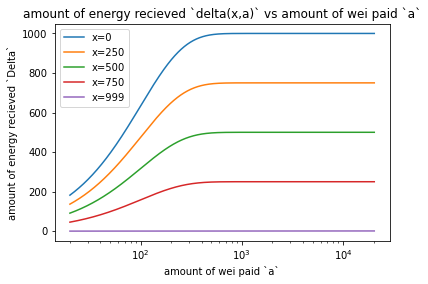

In [12]:
plt.semilogx(a,Delta[:,0], a,Delta[:,250], a,Delta[:,500], a,Delta[:,750], a,Delta[:,999])
plt.title('amount of energy recieved `delta(x,a)` vs amount of wei paid `a`')
plt.xlabel('amount of wei paid `a`')
plt.ylabel('amount of energy recieved `Delta`')
plt.legend(['x=0','x=250','x=500','x=750','x=999'])

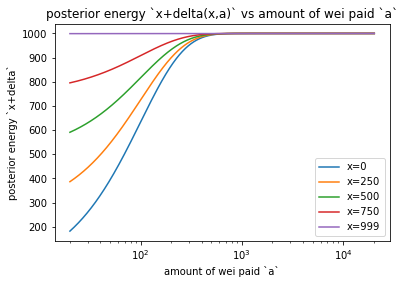

In [13]:
plt.semilogx(a,Delta[:,0], a,Delta[:,250]+250, a,Delta[:,500]+500, a,Delta[:,750]+750, a,Delta[:,999]+999)
plt.title('posterior energy `x+delta(x,a)` vs amount of wei paid `a`')
plt.xlabel('amount of wei paid `a`')
plt.ylabel('posterior energy `x+delta`')
plt.legend(['x=0','x=250','x=500','x=750','x=999'])

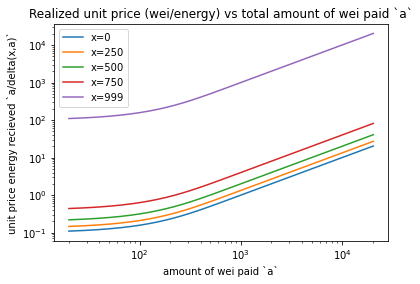

In [14]:
plt.loglog(a,a/Delta[:,0], a,a/Delta[:,250], a,a/Delta[:,500], a,a/Delta[:,750], a,a/Delta[:,999])
plt.title('Realized unit price (wei/energy) vs total amount of wei paid `a`')
plt.xlabel('amount of wei paid `a`')
plt.ylabel('unit price energy recieved `a/delta(x,a)`')
plt.legend(['x=0','x=250','x=500','x=750','x=999'])

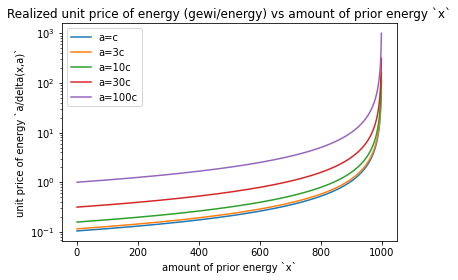

In [15]:
plt.semilogy(x,c/delta(x,c),x,3*c/delta(x,3*c),x,10*c/delta(x,10*c), x,30*c/delta(x,30*c),x,100*c/delta(x,100*c))
plt.title('Realized unit price of energy (gewi/energy) vs amount of prior energy `x`')
plt.xlabel('amount of prior energy `x`')
plt.ylabel('unit price of energy `a/delta(x,a)`')
plt.legend(['a=c','a=3c','a=10c','a=30c','a=100c'])